# Mount google drive to download and upload files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Seeding for reproducibility

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

# Importing dependencies

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

import json
from PIL import Image

# Data processing

In [ ]:
# Unzip the dataset
!unzip /content/drive/MyDrive/PlantVillage_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage_Dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11030437-942c-4cb4-a40e-b35236778a4b___UF.GRC_YLCV_Lab 02923.JPG  
  inflating: PlantVillage_Dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1104914f-f715-4b02-b551-5cdf03f54bcb___YLCV_NREC 2717.JPG  
  inflating: PlantVillage_Dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11061195-ce9c-4171-819d-663342a186e8___YLCV_NREC 0257.JPG  
  inflating: PlantVillage_Dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/110c50e6-039e-4f32-bda1-26262968ab8a___YLCV_GCREC 5539.JPG  
  inflating: PlantVillage_Dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1114e83e-5477-483c-8bed-847b2c169c9f___YLCV_NREC 2257.JPG  
  inflating: PlantVillage_Dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/111d4096-e9eb-4f32-9a25-f3c19b92c627___YLCV_GCREC 2209.JPG  
  inflating: PlantVillage_Dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1126f296-0c84-4f9d-b66b-1e9

(256, 256, 3)


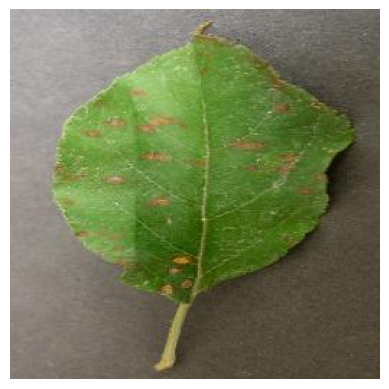

In [ ]:
# Base directory for the dataset
base_dir = '/content/PlantVillage_Dataset/color'

# Test an image from dataset
img = mpimg.imread(base_dir + '/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG')
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

# Image parameters

In [ ]:
img_height = 224
img_width = 224
batch_size = 64

# Data augmentation and split

In [ ]:
# Data augmentation to reduce overfitting
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train dataset
train_ds = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

# Validation dataset
validation_ds = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

# Classes
class_names = list(train_ds.class_indices.keys())
print("Classes: ", class_names)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Classes:  ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', '

# Convolutional Neural Network - CNN



In [ ]:
model = models.Sequential()

model.add(layers.InputLayer(shape=(img_height, img_width, 3)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_names), activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,254,438 (84.89 MB)

 Trainable params: 22,254,438 (84.89 MB)

 Non-trainable params: 0 (0.00 B)

# Model training

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Early stop to prevent overfitting if validation performance starts to degrade
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    callbacks=[early_stop],
    epochs=25
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
679/679 ━━━━━━━━━━━━━━━━━━━━ 603s 874ms/step - accuracy: 0.2841 - loss: 2.7446 - val_accuracy: 0.6442 - val_loss: 1.2321
Epoch 2/25
679/679 ━━━━━━━━━━━━━━━━━━━━ 588s 866ms/step - accuracy: 0.5930 - loss: 1.3792 - val_accuracy: 0.7551 - val_loss: 0.7932
Epoch 3/25
679/679 ━━━━━━━━━━━━━━━━━━━━ 589s 867ms/step - accuracy: 0.6830 - loss: 1.0303 - val_accuracy: 0.7827 - val_loss: 0.6974
Epoch 4/25
679/679 ━━━━━━━━━━━━━━━━━━━━ 589s 867ms/step - accuracy: 0.7339 - loss: 0.8535 - val_accuracy: 0.8282 - val_loss: 0.5548
Epoch 5/25
679/679 ━━━━━━━━━━━━━━━━━━━━ 586s 863ms/step - accuracy: 0.7758 - loss: 0.7214 - val_accuracy: 0.8094 - val_loss: 0.5604
Epoch 6/25
679/679 ━━━━━━━━━━━━━━━━━━━━ 581s 856ms/step - accuracy: 0.7898 - loss: 0.6727 - val_accuracy: 0.8875 - val_loss: 0.3605
Epoch 7/25
679/679 ━━━━━━━━━━━━━━━━━━━━ 589s 868ms/step - accuracy: 0.8127 - loss: 0.5909 - val_accuracy: 0.8853 - val_loss: 0.3532
Epoch 8/25
679/679 ━━━━━━━━━━━━━━━━━━━━ 589s 868ms/step - accuracy: 0.8231 -

# Model evaluation

In [ ]:
# Evaluate validation loss
print("Evaluating model...")

val_loss, val_accuracy = model.evaluate(validation_ds)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
170/170 ━━━━━━━━━━━━━━━━━━━━ 117s 689ms/step - accuracy: 0.9414 - loss: 0.1738
Validation Accuracy: 94.37%


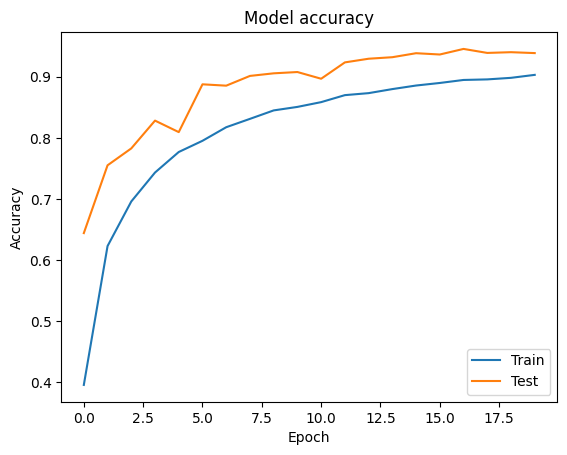

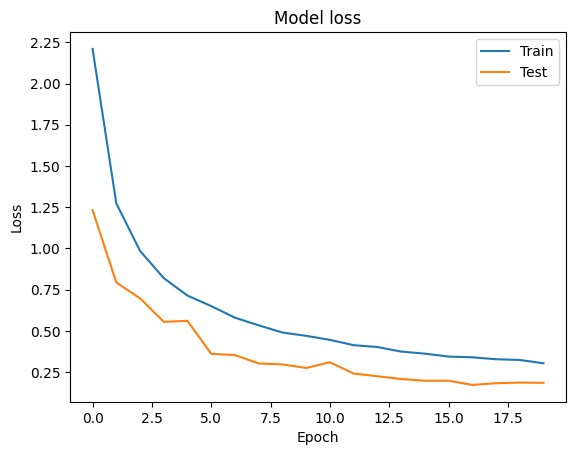

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Using the trained model

In [ ]:
# Create a mapping between class indices and class names
class_indices = {v: k for k, v in train_ds.class_indices.items()}
class_indices

# Save the class names as json file
json.dump(class_indices, open('drive/MyDrive/class_indices.json', 'w'))

In [ ]:
# Function to Load and Preprocess the Image
def load_and_preprocess_image(img_path):
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img_array = np.array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array.astype('float32') / 255.
  return img_array

# Function to Predict the Class of an Image
def predict_image(img_path, class_indices):
  preprocessed_img = load_and_preprocess_image(img_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

# Example usage

In [ ]:
# Prediction on a sample image
img_path = '/content/Apple_Black_Rot.jpg'

predicted_class = predict_image(img_path, class_indices)
print(f"The predicted class for the image is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The predicted class for the image is: Apple___Black_rot


# Save the model to drive

In [ ]:
model.save('drive/MyDrive/trained_models/plant_disease_prediction_model.h5')
model.save('drive/MyDrive/trained_models/plant_disease_prediction_model.keras')